In [ ]:
#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import time
import os

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/교내공모전/교내통계경진대회_데이터셋 - 2022년 퇴근 (상선,내선).csv")
data2

,호선명,지하철역,위도,경도,상세주소,총층수,퇴근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",열차내 사고,역구내 사고,출입문관련,승강설비관련,발빠짐,기타,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"퇴근시간 혼잡도 평균(상선,내선)",퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW
0,2,강남,37.497175,127.027926,서울서초구서초동1374,3,4.543860,231421,306995,194665,133157,175540,102460,831736.5000,3,2,0,4,0,2,0,8,5,0,1,6,1,4,105.528571,63623,64662,13830,28290,4255,6819,77414,176616,25441,54152,44573,14110,31901,3743,9226,53525,53178,14839
1,2,강변,37.535095,127.094681,서울광진구구의동546-6,2,4.517241,55399,60433,42352,75872,104712,74744,315529.9167,3,0,0,3,1,0,0,4,9,0,0,7,0,5,33.257143,28194,51770,6347,23286,6113,6125,17597,59279,5337,31968,43201,6049,29350,5317,7344,19731,74491,5656
2,2,건대입구,37.540693,127.070230,서울광진구화양동6-4,5,4.508475,71707,82653,62600,104416,148210,99593,374320.8333,3,0,0,4,2,0,0,6,11,1,2,2,2,6,38.771429,59948,60871,9841,34947,4969,13926,19069,57530,8332,83523,47796,8416,58633,5727,14133,56398,82202,11638
3,2,교대,37.493415,127.014080,서울서초구서초동1672-9,3,4.556522,94092,133499,62492,59247,71156,40900,367315.6667,2,0,1,13,1,0,0,15,6,0,2,4,2,2,111.600000,42097,48426,9262,27828,4485,7197,41261,109678,11762,38798,46772,9906,24652,4079,6245,33489,53051,12053
4,2,구로디지털단지,37.485266,126.901401,서울구로구구로동810-3,3,4.663717,125847,211812,99898,101032,155570,124825,731249.1667,3,1,0,3,5,4,0,13,10,1,0,8,0,6,68.985714,38836,63695,11051,16667,6515,5802,71899,243316,13081,38540,34550,12178,36146,4952,11557,41971,65567,10264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,8,석촌,37.505431,127.106979,서울송파구석촌동209,2,7.369565,16376,18257,10620,20357,28044,18316,151930.1667,2,0,0,0,0,0,0,0,7,1,0,1,0,7,82.357143,27755,41779,5736,27383,4422,9000,13859,43978,5134,33634,44697,6922,25999,4065,8310,19300,78041,6217
235,8,송파,37.499703,127.112183,서울송파구가락동459-4,2,7.385417,14008,15648,8586,18854,27084,21194,145565.6667,2,1,0,0,0,0,0,1,10,1,0,3,0,4,86.028571,19268,29954,5431,27415,3273,8245,11140,39031,6073,20273,48129,5143,14502,2874,5783,15194,57882,6242
236,8,잠실,37.513950,127.102234,서울송파구신천동8,3,7.369565,44590,62654,36630,34895,41081,20704,226009.8333,2,0,1,4,2,1,0,8,6,1,0,6,0,8,83.714286,120574,128050,15411,18363,4393,4911,57057,153319,19847,103540,32495,8111,70325,2858,8240,66926,42590,7351
237,8,장지,37.478703,127.126191,서울송파구장지동217-3,2,7.347826,41998,45848,25291,31529,49029,34351,295459.2500,2,0,0,0,0,0,0,0,6,2,0,9,0,12,50.642857,46442,93639,12719,18093,4935,4972,65305,191823,14468,40525,29629,14069,43097,4150,18770,32622,60490,13189


# 상선 내선 퇴근 노선:2,3,4,7

In [ ]:
data2 = data2[data2['호선명'].isin([2, 3, 4, 7])]
len(data2)

146

In [ ]:
columns_to_remove = ['열차내 사고', '역구내 사고', '출입문관련', '승강설비관련', '발빠짐', '기타']
data2 = data2.drop(columns=columns_to_remove)
data2[data2.isnull().any(axis=1)]

,호선명,지하철역,위도,경도,상세주소,총층수,퇴근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"퇴근시간 혼잡도 평균(상선,내선)",퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW


# OLS 학습 후 다중공선성 확인

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = data2.copy()

In [ ]:
columns_to_remove = ['호선명', '지하철역', '위도', '경도', '상세주소']
df1 = df1.drop(columns=columns_to_remove)

In [ ]:
import re

def modify_column_names(df):
    new_columns = []
    for column in df.columns:
        modified_name = re.sub(r'\([^)]*\)', '', column)
        modified_name = modified_name.replace('-', '_')
        modified_name = modified_name.replace(' ', '_')
        new_columns.append(modified_name)

    return new_columns

df1.columns = modify_column_names(df1)
df1

,총층수,퇴근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,퇴근시간_혼잡도_평균,퇴근출발_EE,퇴근출발_EH,퇴근출발_EW,퇴근출발_HE,퇴근출발_HH,퇴근출발_HW,퇴근출발_WE,퇴근출발_WH,퇴근출발_WW,퇴근도착_EE,퇴근도착_EH,퇴근도착_EW,퇴근도착_HE,퇴근도착_HH,퇴근도착_HW,퇴근도착_WE,퇴근도착_WH,퇴근도착_WW
0,3,4.543860,231421,306995,194665,133157,175540,102460,831736.50000,3,8,5,0,1,6,1,4,105.528571,63623,64662,13830,28290,4255,6819,77414,176616,25441,54152,44573,14110,31901,3743,9226,53525,53178,14839
1,2,4.517241,55399,60433,42352,75872,104712,74744,315529.91670,3,4,9,0,0,7,0,5,33.257143,28194,51770,6347,23286,6113,6125,17597,59279,5337,31968,43201,6049,29350,5317,7344,19731,74491,5656
2,5,4.508475,71707,82653,62600,104416,148210,99593,374320.83330,3,6,11,1,2,2,2,6,38.771429,59948,60871,9841,34947,4969,13926,19069,57530,8332,83523,47796,8416,58633,5727,14133,56398,82202,11638
3,3,4.556522,94092,133499,62492,59247,71156,40900,367315.66670,2,15,6,0,2,4,2,2,111.600000,42097,48426,9262,27828,4485,7197,41261,109678,11762,38798,46772,9906,24652,4079,6245,33489,53051,12053
4,3,4.663717,125847,211812,99898,101032,155570,124825,731249.16670,3,13,10,1,0,8,0,6,68.985714,38836,63695,11051,16667,6515,5802,71899,243316,13081,38540,34550,12178,36146,4952,11557,41971,65567,10264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2,4.888889,13554,13591,7128,26117,44417,36192,147597.83330,3,0,8,2,1,5,1,5,20.828571,12648,23816,3366,22017,2030,7425,8015,28886,2705,13368,51565,5421,10374,2298,3612,9568,103555,4617
225,4,4.934272,61987,107824,51517,19783,20520,13292,244815.25000,2,2,8,2,0,10,0,6,90.528571,114472,119337,23735,14521,1989,3625,95531,229096,17762,82460,23273,13114,55101,1845,11507,73371,25196,16851
226,4,5.084541,18596,18903,11053,17195,23813,20865,95405.08333,3,1,8,1,2,11,2,7,65.185714,29099,56466,6991,32461,4720,11188,12478,48988,4936,34717,62628,7062,34661,4615,8783,24630,93542,6990
227,3,5.107843,28767,24149,13536,34821,53025,51620,246439.00000,3,0,20,1,2,10,2,7,51.757143,5715,9119,903,17267,2070,5660,2403,7411,990,6443,30114,1678,4883,2929,1200,2080,36888,1311


In [ ]:
text_join1 = ' + '.join(df1.columns)
text_join1

'총층수 + 퇴근_상내선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 퇴근시간_혼잡도_평균 + 퇴근출발_EE + 퇴근출발_EH + 퇴근출발_EW + 퇴근출발_HE + 퇴근출발_HH + 퇴근출발_HW + 퇴근출발_WE + 퇴근출발_WH + 퇴근출발_WW + 퇴근도착_EE + 퇴근도착_EH + 퇴근도착_EW + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_HW + 퇴근도착_WE + 퇴근도착_WH + 퇴근도착_WW'

In [ ]:
print(df1.columns)

Index(['총층수', '퇴근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근시간_혼잡도_평균', '퇴근출발_EE', '퇴근출발_EH', '퇴근출발_EW',
       '퇴근출발_HE', '퇴근출발_HH', '퇴근출발_HW', '퇴근출발_WE', '퇴근출발_WH', '퇴근출발_WW',
       '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_EW', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_HW',
       '퇴근도착_WE', '퇴근도착_WH', '퇴근도착_WW'],
      dtype='object')


In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df1.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['총층수', '퇴근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근출발_EE', '퇴근출발_EH', '퇴근출발_EW',
       '퇴근출발_HE', '퇴근출발_HH', '퇴근출발_HW', '퇴근출발_WE', '퇴근출발_WH', '퇴근출발_WW',
       '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_EW', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_HW',
       '퇴근도착_WE', '퇴근도착_WH', '퇴근도착_WW']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬

## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다.
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('퇴근시간_혼잡도_평균~총층수 + 퇴근_상내선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 퇴근출발_EE + 퇴근출발_EH + 퇴근출발_EW + 퇴근출발_HE + 퇴근출발_HH + 퇴근출발_HW + 퇴근출발_WE + 퇴근출발_WH + 퇴근출발_WW + 퇴근도착_EE + 퇴근도착_EH + 퇴근도착_EW + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_HW + 퇴근도착_WE + 퇴근도착_WH + 퇴근도착_WW',data=sdf).fit()

variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1.774
Date:                Sat, 11 Nov 2023   Prob (F-statistic):             0.0136
Time:                        07:09:56   Log-Likelihood:                 188.32
No. Observations:                 146   AIC:                            -306.6
Df Residuals:                     111   BIC:                            -202.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.079e-17      0.006  -3.29e-15      1.000      -0.013       0.013
총층수             0.0219      0.094      0.233      0.816      -0.164       0.208
퇴근_상내선_배차간격    -0.1482      0.094     -1.575      0.118      -0.335       0.038
승차인원_1718       0.8096      0.482      1.679      0.096      -0.146       1.765
승차인원_1819      -0.5145      0.607     -0.848      0.398      -1.717       0.688
승차인원_1920       0.0199      0.642      0.031      0.975      -1.252       1.292
하차인원_1718       1.5671      0.900      1.741      0.084      -0.216       3.351
하차인원_1819      -3.3779      1.238     -2.728      0.007      -5.832      -0.924
하차인원_1920       1.7656      0.616      2.868      0.005       0.546       2.986
환승유입인원수        -0.0845      0.120     -0.707      0.481      -0.321       0.152
안전시설지수         -0.0594      0.091     -0.652      0.516      -0.240       0.121
총사고발생수          0.1764      0.114      1.548      0.124      -0.049       0.402
반경_내_학교_수      -0.2370      0.104     -2.268      0.025      -0.444      -0.030
반경_내_주요공원_수     0.0673      0.105      0.639      0.524      -0.141       0.276
반경_내_대학_수       0.1091      0.048      2.259      0.026       0.013       0.205
반경_아파트_수        0.0828      0.091      0.909      0.365      -0.098       0.263
반경_내_대학교_수      0.1091      0.048      2.259      0.026       0.013       0.205
공공_자전거_시설_수    -0.1338      0.112     -1.197      0.234      -0.355       0.088
퇴근출발_EE         0.2761      0.782      0.353      0.725      -1.273       1.826
퇴근출발_EH        -0.3828      0.657     -0.583      0.561      -1.685       0.919
퇴근출발_EW         1.0930      0.960      1.138      0.257      -0.810       2.996
퇴근출발_HE        -0.0299      0.695     -0.043      0.966      -1.407       1.348
퇴근출발_HH        -0.5029      0.365     -1.378      0.171      -1.226       0.220
퇴근출발_HW        -0.3434      0.448     -0.766      0.445      -1.231       0.545
퇴근출발_WE        -0.3242      0.781     -0.415      0.679      -1.871       1.223
퇴근출발_WH        -0.6774      0.609     -1.112      0.269      -1.885       0.530
퇴근출발_WW         0.3914      0.533      0.735      0.464      -0.664       1.447
퇴근도착_EE        -0.6078      0.897     -0.678      0.499      -2.385       1.169
퇴근도착_EH        -0.6354      0.701     -0.907      0.366      -2.024       0.753
퇴근도착_EW        -0.0950      0.611     -0.156      0.877      -1.305       1.115
퇴근도착_HE        -1.0807      0.796     -1.358      0.177      -2.657       0.496
퇴근도착_HH         0.9535      0.439      2.173      0.032       0.084       1.823
퇴근도착_HW         0.3675      0.530      0.693      0.489      -0.683       1.418
퇴근도착_WE         1.1804      0.737      1.602      0.112      -0.279       2.640
퇴근도착_WH         0.7089      0.402      1.764      0.080      -0.087       1.505
퇴근도착_WW        -0.4705      0.629     -0.74

In [ ]:
df_res

,Variable,Estimate,VIF
0,총층수,0.021853,1.507727e+00
1,퇴근_상내선_배차간격,-0.148225,1.516894e+00
2,승차인원_1718,0.809562,3.981414e+01
3,승차인원_1819,-0.514470,6.304603e+01
4,승차인원_1920,0.019912,7.064152e+01
5,하차인원_1718,1.567115,1.387993e+02
6,하차인원_1819,-3.377895,2.627000e+02
7,하차인원_1920,1.765561,6.494689e+01
8,환승유입인원수,-0.084523,2.448973e+00
9,안전시설지수,-0.059378,1.421122e+00


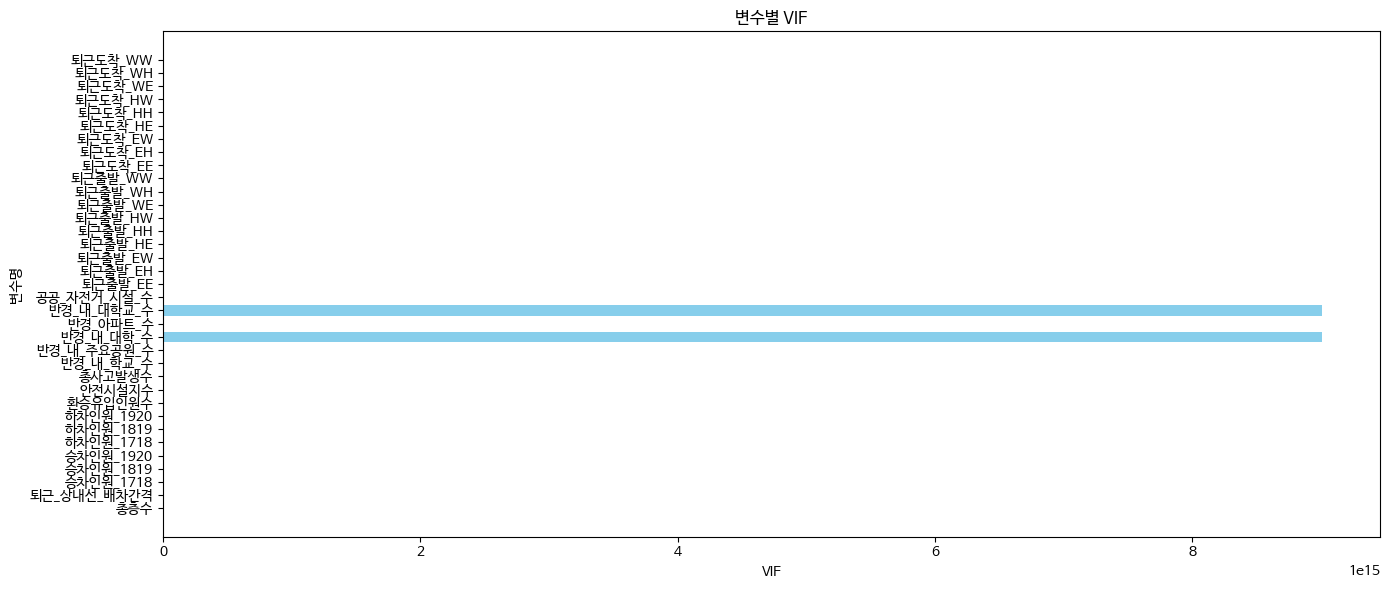

In [ ]:
# 변수명과 VIF 값 추출
variables = df_res['Variable']
vif_values = df_res['VIF']

# 막대 그래프로 변수별 VIF 시각화
plt.figure(figsize=(14, 6))
plt.barh(variables, vif_values, color='skyblue')
plt.xlabel('VIF')
plt.ylabel('변수명')
plt.title('변수별 VIF')
plt.tight_layout()
plt.show()

# 다중공선성이 있기에 변수선택을 진행 [후진 제거법]

In [ ]:
## 후진 소거법
import statsmodels.api as sm

variables = ['총층수', '퇴근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '퇴근출발_EE', '퇴근출발_EH', '퇴근출발_EW',
       '퇴근출발_HE', '퇴근출발_HH', '퇴근출발_HW', '퇴근출발_WE', '퇴근출발_WH', '퇴근출발_WW',
       '퇴근도착_EE', '퇴근도착_EH', '퇴근도착_EW', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_HW',
       '퇴근도착_WE', '퇴근도착_WH', '퇴근도착_WW']  # 설명 변수 리스트

y = df1['퇴근시간_혼잡도_평균']

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df1[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['퇴근_상내선_배차간격',
 '승차인원_1718',
 '하차인원_1718',
 '하차인원_1819',
 '하차인원_1920',
 '총사고발생수',
 '반경_내_학교_수',
 '반경_내_대학_수',
 '반경_내_대학교_수',
 '퇴근출발_EW',
 '퇴근출발_WH',
 '퇴근도착_HE',
 '퇴근도착_HH',
 '퇴근도착_WE']

In [ ]:
selected_columns = ['퇴근_상내선_배차간격','퇴근시간_혼잡도_평균',
 '승차인원_1718',
 '하차인원_1718',
 '하차인원_1819',
 '하차인원_1920',
 '총사고발생수',
 '반경_내_학교_수',
 '반경_내_대학_수',
 '반경_내_대학교_수',
 '퇴근출발_EW',
 '퇴근출발_WH',
 '퇴근도착_HE',
 '퇴근도착_HH',
 '퇴근도착_WE']
df2 = df1[selected_columns]
df2

,퇴근_상내선_배차간격,퇴근시간_혼잡도_평균,승차인원_1718,하차인원_1718,하차인원_1819,하차인원_1920,총사고발생수,반경_내_학교_수,반경_내_대학_수,반경_내_대학교_수,퇴근출발_EW,퇴근출발_WH,퇴근도착_HE,퇴근도착_HH,퇴근도착_WE
0,4.543860,105.528571,231421,133157,175540,102460,8,5,1,1,13830,176616,31901,3743,53525
1,4.517241,33.257143,55399,75872,104712,74744,4,9,0,0,6347,59279,29350,5317,19731
2,4.508475,38.771429,71707,104416,148210,99593,6,11,2,2,9841,57530,58633,5727,56398
3,4.556522,111.600000,94092,59247,71156,40900,15,6,2,2,9262,109678,24652,4079,33489
4,4.663717,68.985714,125847,101032,155570,124825,13,10,0,0,11051,243316,36146,4952,41971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,4.888889,20.828571,13554,26117,44417,36192,0,8,1,1,3366,28886,10374,2298,9568
225,4.934272,90.528571,61987,19783,20520,13292,2,8,0,0,23735,229096,55101,1845,73371
226,5.084541,65.185714,18596,17195,23813,20865,1,8,2,2,6991,48988,34661,4615,24630
227,5.107843,51.757143,28767,34821,53025,51620,0,20,2,2,903,7411,4883,2929,2080


# 최적모형 선택

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from itertools import combinations
from statsmodels.formula.api import ols

In [ ]:
df2.insert(0,'Intercept',[1]*len(df2)) ## 상수항 추가

In [ ]:
df2

,Intercept,퇴근_상내선_배차간격,퇴근시간_혼잡도_평균,승차인원_1718,하차인원_1718,하차인원_1819,하차인원_1920,총사고발생수,반경_내_학교_수,반경_내_대학_수,반경_내_대학교_수,퇴근출발_EW,퇴근출발_WH,퇴근도착_HE,퇴근도착_HH,퇴근도착_WE
0,1,4.543860,105.528571,231421,133157,175540,102460,8,5,1,1,13830,176616,31901,3743,53525
1,1,4.517241,33.257143,55399,75872,104712,74744,4,9,0,0,6347,59279,29350,5317,19731
2,1,4.508475,38.771429,71707,104416,148210,99593,6,11,2,2,9841,57530,58633,5727,56398
3,1,4.556522,111.600000,94092,59247,71156,40900,15,6,2,2,9262,109678,24652,4079,33489
4,1,4.663717,68.985714,125847,101032,155570,124825,13,10,0,0,11051,243316,36146,4952,41971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1,4.888889,20.828571,13554,26117,44417,36192,0,8,1,1,3366,28886,10374,2298,9568
225,1,4.934272,90.528571,61987,19783,20520,13292,2,8,0,0,23735,229096,55101,1845,73371
226,1,5.084541,65.185714,18596,17195,23813,20865,1,8,2,2,6991,48988,34661,4615,24630
227,1,5.107843,51.757143,28767,34821,53025,51620,0,20,2,2,903,7411,4883,2929,2080


In [ ]:
print(df2.columns)

Index(['Intercept', '퇴근_상내선_배차간격', '퇴근시간_혼잡도_평균', '승차인원_1718', '하차인원_1718',
       '하차인원_1819', '하차인원_1920', '총사고발생수', '반경_내_학교_수', '반경_내_대학_수',
       '반경_내_대학교_수', '퇴근출발_EW', '퇴근출발_WH', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_WE'],
      dtype='object')


In [ ]:
text_join2 = ' + '.join(df2.columns)
text_join2

'Intercept + 퇴근_상내선_배차간격 + 퇴근시간_혼잡도_평균 + 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 반경_내_학교_수 + 반경_내_대학_수 + 반경_내_대학교_수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE'

In [ ]:
#모델 적합
fit = ols('퇴근시간_혼잡도_평균~퇴근_상내선_배차간격 + 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 반경_내_학교_수 + 반경_내_대학_수 + 반경_내_대학교_수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE',data=df2).fit()

## hat matrix 계산
X = np.array(df2[['Intercept', '퇴근_상내선_배차간격', '승차인원_1718', '하차인원_1718',
       '하차인원_1819', '하차인원_1920', '총사고발생수', '반경_내_학교_수', '반경_내_대학_수',
       '반경_내_대학교_수', '퇴근출발_EW', '퇴근출발_WH', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_WE']]) ## Model matrix for full model

X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)
hat_matrix = np.matmul(np.matmul(X,X_tX_inv),X.transpose()) ## hat matrix
diagonals = np.array([hat_matrix[i][i] for i in range(len(df2))]) ## hat matrix의 대각원소

response = '퇴근시간_혼잡도_평균'
y = df2[response] ## 반응 변수 벡터
variables = ['퇴근_상내선_배차간격', '승차인원_1718', '하차인원_1718',
       '하차인원_1819', '하차인원_1920', '총사고발생수', '반경_내_학교_수', '반경_내_대학_수',
       '반경_내_대학교_수', '퇴근출발_EW', '퇴근출발_WH', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_WE'] ## 총 변수집합

num_var = len(variables) ## 총 변수 개수
num_data = len(df2) ## 데이터 개수
mse_full = fit.mse_resid ## 모든 변수를 포함한 mean square residual
mean_response = np.mean(y) ## y의 평균

cp_list = [] ## Mallow's C
ad_r_list = [] ## 수정된 결정계수
aic_list = [] ## Akaike's information criterion
bic_list = [] ## Bayes information criterion
press_list = [] ## press criterion

num_parameter = [] ## 파라미터 즉 절편을 포함한 회귀계수의 개수
subsets = [] ## 변수의 집합
for p in range(num_var+1):
    if p == 0: ## 절편만 있는 모형
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None') ## 절편만 있고 변수는 없음
        sub_fit = ols(exp,data=df2).fit() ## 절편만 있는 모형 적합
        sse = np.sum(np.square(sub_fit.resid)) ## square sum of residual
        sst = np.sum(np.square(y-mean_response)) ## total sum of square
        cp = sse/mse_full - (num_data-2*(p+1)) ## Mallow's C
        ad_r = 0 ## 수정된 결정계수 절편만 있다면 수정된 결정계수 값은 0
        aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1) ## Akaike's information criterion
        bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1) ## Bayes information criterion
        press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals))) ## press
        cp_list.append(cp)
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        press_list.append(press)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = ols(exp,data=df2).fit()
            sse = np.sum(np.square(sub_fit.resid))
            sst = np.sum(np.square(y-np.mean(y)))
            cp = sse/mse_full - (num_data-2*(p+1))
            ad_r = 1 - ((num_data-1)/(num_data-p-1))*(sse/sst)
            aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1)
            bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1)
            press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals)))
            cp_list.append(cp)
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            press_list.append(press)
            num_parameter.append(p+1)

df2_res = pd.DataFrame()
df2_res['Variables'] = subsets
df2_res['Number_of_parameter'] = num_parameter
df2_res['Ad_R'] = ad_r_list
df2_res['Cp'] = cp_list
df2_res['AIC'] = aic_list
df2_res['BIC'] = bic_list
df2_res['PRESS'] = press_list

In [ ]:
df2_res

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
0,None,1,0.000000,40.254113,977.181907,980.165513,911341.716128
1,퇴근_상내선_배차간격,2,0.021423,37.063404,975.009826,980.977039,984638.174781
2,승차인원_1718,2,0.060332,29.943598,969.086102,975.053315,844935.364197
3,하차인원_1718,2,0.011650,38.851593,976.460600,982.427813,931682.239383
4,하차인원_1819,2,0.004670,40.128948,977.488174,983.455387,917022.990840
...,...,...,...,...,...,...,...
16379,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1920, ...",14,0.160878,22.749885,963.859522,1005.630015,931835.049551
16380,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1819, 하차인원_1920, ...",14,0.194629,17.088644,957.865745,999.636238,686037.935572
16381,"퇴근_상내선_배차간격, 하차인원_1718, 하차인원_1819, 하차인원_1920, ...",14,0.183639,18.932139,959.844671,1001.615163,583203.113784
16382,"승차인원_1718, 하차인원_1718, 하차인원_1819, 하차인원_1920, 총사...",14,0.189597,17.932831,958.775280,1000.545773,357755.384630


In [ ]:
# Ad_R, Cp, AIC, BIC, PRESS 지표에 대한 최적모델
best_models = {
    'Ad_R': df2_res[df2_res['Ad_R'] == df2_res['Ad_R'].max()],
    'Cp': df2_res[df2_res['Cp'] == df2_res['Cp'].min()],
    'AIC': df2_res[df2_res['AIC'] == df2_res['AIC'].min()],
    'BIC': df2_res[df2_res['BIC'] == df2_res['BIC'].min()],
    'PRESS': df2_res[df2_res['PRESS'] == df2_res['PRESS'].min()]
}

best_models_df = pd.DataFrame()
for metric, best_model in best_models.items():
    best_models_df = best_models_df.append(best_model)

best_models_df

<ipython-input-32-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-32-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-32-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-32-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-32-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed fro

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
16374,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
16375,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
16374,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
16375,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
16374,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
16375,"퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, ...",14,0.213043,14.000000,954.488873,996.259366,446960.683437
2,승차인원_1718,2,0.060332,29.943598,969.086102,975.053315,844935.364197
14323,"승차인원_1718, 하차인원_1718, 하차인원_1819, 하차인원_1920, 퇴근...",10,0.150333,20.837499,962.041466,991.877532,108294.196816


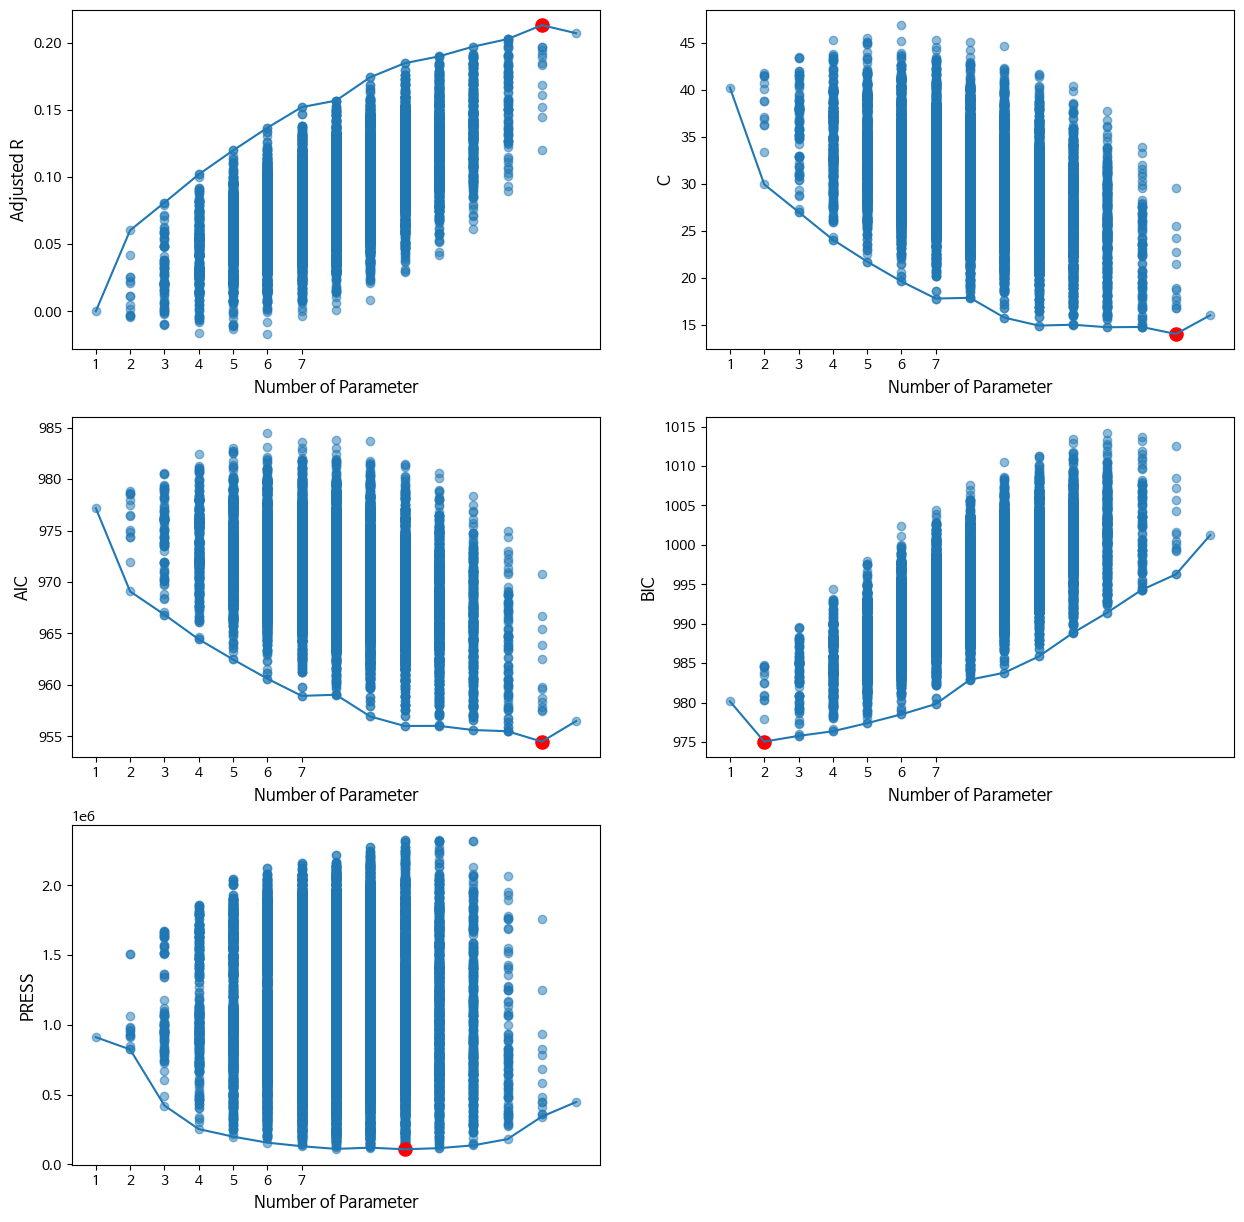

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
font_size = 12
columns = ['Ad_R', 'Cp', 'AIC', 'BIC', 'PRESS']
xlabel = 'Number of Parameter'
ylabels = ['Adjusted R','C','AIC','BIC','PRESS']

marker_style = dict(color='red',marker='o',markersize=10)

for i in range(len(ylabels)):
    ind = 320+i+1
    plt.subplot(ind)
    plt.scatter(df2_res['Number_of_parameter'],df2_res[columns[i]],alpha=0.5)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabels[i],fontsize=font_size)
    if ylabels[i] == 'Adjusted R':
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].max()
        idx = temp_df2[columns[i]].idxmax()
        max_val = temp_df2[columns[i]].max()
        plt.scatter(temp_df2['Number_of_parameter'][idx], max_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    else:
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].min()
        idx = temp_df2[columns[i]].idxmin()
        min_val = temp_df2[columns[i]].min()
        plt.scatter(temp_df2['Number_of_parameter'][idx], min_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    plt.xticks(range(1,8))

plt.show()

수정결정계수, Mallows' Cp, AIC가 파라미터가 14개인 모형을 선호

In [ ]:
best_models_df[best_models_df['Number_of_parameter'] == 14]['Variables'].unique()

array(['퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, 하차인원_1920, 총사고발생수, 반경_내_학교_수, 반경_내_대학_수, 퇴근출발_EW, 퇴근출발_WH, 퇴근도착_HE, 퇴근도착_HH, 퇴근도착_WE',
       '퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, 하차인원_1920, 총사고발생수, 반경_내_학교_수, 반경_내_대학교_수, 퇴근출발_EW, 퇴근출발_WH, 퇴근도착_HE, 퇴근도착_HH, 퇴근도착_WE'],
      dtype=object)

['퇴근_상내선_배차간격, 승차인원_1718, 하차인원_1718, 하차인원_1819, 하차인원_1920, 총사고발생수, 반경_내_학교_수, 반경_내_대학_수, 퇴근출발_EW, 퇴근출발_WH, 퇴근도착_HE, 퇴근도착_HH, 퇴근도착_WE']에 상수항 포함 버전

# 최종 모델적합

상수항 포함 케이스

In [ ]:
selected_columns = ['퇴근시간_혼잡도_평균','퇴근_상내선_배차간격', '승차인원_1718', '하차인원_1718', '하차인원_1819', '하차인원_1920', '총사고발생수', '반경_내_학교_수', '반경_내_대학_수', '퇴근출발_EW', '퇴근출발_WH', '퇴근도착_HE', '퇴근도착_HH', '퇴근도착_WE']
df3 = df1[selected_columns]
df3

,퇴근시간_혼잡도_평균,퇴근_상내선_배차간격,승차인원_1718,하차인원_1718,하차인원_1819,하차인원_1920,총사고발생수,반경_내_학교_수,반경_내_대학_수,퇴근출발_EW,퇴근출발_WH,퇴근도착_HE,퇴근도착_HH,퇴근도착_WE
0,105.528571,4.543860,231421,133157,175540,102460,8,5,1,13830,176616,31901,3743,53525
1,33.257143,4.517241,55399,75872,104712,74744,4,9,0,6347,59279,29350,5317,19731
2,38.771429,4.508475,71707,104416,148210,99593,6,11,2,9841,57530,58633,5727,56398
3,111.600000,4.556522,94092,59247,71156,40900,15,6,2,9262,109678,24652,4079,33489
4,68.985714,4.663717,125847,101032,155570,124825,13,10,0,11051,243316,36146,4952,41971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,20.828571,4.888889,13554,26117,44417,36192,0,8,1,3366,28886,10374,2298,9568
225,90.528571,4.934272,61987,19783,20520,13292,2,8,0,23735,229096,55101,1845,73371
226,65.185714,5.084541,18596,17195,23813,20865,1,8,2,6991,48988,34661,4615,24630
227,51.757143,5.107843,28767,34821,53025,51620,0,20,2,903,7411,4883,2929,2080


In [ ]:
text_join3 = ' + '.join(df3.columns)
text_join3

'퇴근시간_혼잡도_평균 + 퇴근_상내선_배차간격 + 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 반경_내_학교_수 + 반경_내_대학_수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE'

In [ ]:
model1 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~퇴근_상내선_배차간격 + 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 반경_내_학교_수 + 반경_내_대학_수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE', data=df3) #상수항 포함모델
results1 = model1.fit()

# 계수 및 상수항 출력
coefficients1 = results1.params
intercept1 = results1.params['Intercept']  # 상수항

print("계수 (Coefficients):\n", coefficients1)
print("상수항 (Intercept):\n", intercept1)

계수 (Coefficients):
 Intercept      67.407611
퇴근_상내선_배차간격    -2.147559
승차인원_1718       0.000224
하차인원_1718       0.001109
하차인원_1819      -0.001903
하차인원_1920       0.001445
총사고발생수          0.875691
반경_내_학교_수      -1.462631
반경_내_대학_수       4.123566
퇴근출발_EW         0.002437
퇴근출발_WH        -0.000240
퇴근도착_HE        -0.001161
퇴근도착_HH         0.002842
퇴근도착_WE         0.000776
dtype: float64
상수항 (Intercept):
 67.4076105167108


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.020
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.54e-05
Time:                        07:31:20   Log-Likelihood:                -670.41
No. Observations:                 146   AIC:                             1369.
Df Residuals:                     132   BIC:                             1411.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      67.4076     10.609      6.354      0.000      46.421      88.394
퇴근_상내선_배차간격    -2.1476      1.083     -1.983      0.049      -4.290      -0.005
승차인원_1718       0.0002      0.000      2.221      0.028    2.45e-05       0.000
하차인원_1718       0.0011      0.001      1.757      0.081      -0.000       0.002
하차인원_1819      -0.0019      0.001     -2.958      0.004      -0.003      -0.001
하차인원_1920       0.0014      0.000      3.391      0.001       0.001       0.002
총사고발생수          0.8757      0.526      1.664      0.099      -0.165       1.917
반경_내_학교_수      -1.4626      0.674     -2.170      0.032      -2.796      -0.129
반경_내_대학_수       4.1236      1.810      2.279      0.024       0.544       7.703
퇴근출발_EW         0.0024      0.001      1.659      0.100      -0.000       0.005
퇴근출발_WH        -0.0002   7.48e-05     -3.203      0.002      -0.000   -9.16e-05
퇴근도착_HE        -0.0012      0.000     -3.942      0.000      -0.002      -0.001
퇴근도착_HH         0.0028      0.002      1.890      0.061      -0.000       0.006
퇴근도착_WE         0.0008      0.000      2.740      0.007       0.000       0.001
==============================================================================
Omnibus:                        1.808   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.876
Skew:                           0.250   Prob(JB):                        0.391
Kurtosis:                       2.757   Cond. No.                     8.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

상수항 없는 버전

In [ ]:
model2 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~퇴근_상내선_배차간격 + 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 반경_내_학교_수 + 반경_내_대학_수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE- 1', data=df3)  #상수항 포함하지 않은 모델
results2 = model2.fit()

# 계수 및 상수항 출력
coefficients2 = results2.params

print("계수 (Coefficients):\n", coefficients2)

계수 (Coefficients):
 퇴근_상내선_배차간격    2.442227
승차인원_1718      0.000370
하차인원_1718      0.000494
하차인원_1819     -0.001105
하차인원_1920      0.001010
총사고발생수         0.608679
반경_내_학교_수      1.299382
반경_내_대학_수      5.332054
퇴근출발_EW        0.003560
퇴근출발_WH       -0.000258
퇴근도착_HE       -0.001384
퇴근도착_HH        0.003195
퇴근도착_WE        0.000851
dtype: float64


In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              42.16
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    9.92e-41
Time:                        07:32:03   Log-Likelihood:                         -689.89
No. Observations:                 146   AIC:                                      1406.
Df Residuals:                     133   BIC:                                      1445.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
퇴근_상내선_배차간격     2.4422      0.918      2.659      0.009       0.626       4.259
승차인원_1718       0.0004      0.000      3.314      0.001       0.000       0.001
하차인원_1718       0.0005      0.001      0.696      0.488      -0.001       0.002
하차인원_1819      -0.0011      0.001     -1.538      0.126      -0.003       0.000
하차인원_1920       0.0010      0.000      2.109      0.037    6.29e-05       0.002
총사고발생수          0.6087      0.597      1.019      0.310      -0.573       1.790
반경_내_학교_수       1.2994      0.586      2.216      0.028       0.139       2.459
반경_내_대학_수       5.3321      2.049      2.603      0.010       1.280       9.384
퇴근출발_EW         0.0036      0.002      2.144      0.034       0.000       0.007
퇴근출발_WH        -0.0003   8.51e-05     -3.030      0.003      -0.000   -8.95e-05
퇴근도착_HE        -0.0014      0.000     -4.159      0.000      -0.002      -0.001
퇴근도착_HH         0.0032      0.002      1.867      0.064      -0.000       0.007
퇴근도착_WE         0.0009      0.000      2.642      0.009       0.000       0.001
==============================================================================
Omnibus:                        8.049   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.409
Skew:                           0.586   Prob(JB):                       0.0149
Kurtosis:                       2.916   Cond. No.                     1.49e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

퇴근_상내선_배차간격, 반경_내_학교_수,반경_내_대학_수 는 유의하지 않음

다중공선성 문제 여전히 있긴 함

제거 후 다시

In [ ]:
model3 = sm.OLS.from_formula('퇴근시간_혼잡도_평균~ 승차인원_1718 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 총사고발생수 + 퇴근출발_EW + 퇴근출발_WH + 퇴근도착_HE + 퇴근도착_HH + 퇴근도착_WE- 1', data=df3)  #상수항 포함하지 않은 모델
results3 = model3.fit()

# 계수 및 상수항 출력
coefficients3 = results3.params

print("계수 (Coefficients):\n", coefficients3)

계수 (Coefficients):
 승차인원_1718    0.000286
하차인원_1718    0.001859
하차인원_1819   -0.002279
하차인원_1920    0.001584
총사고발생수       1.008964
퇴근출발_EW      0.005819
퇴근출발_WH     -0.000291
퇴근도착_HE     -0.002030
퇴근도착_HH      0.008850
퇴근도착_WE      0.000841
dtype: float64


In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            퇴근시간_혼잡도_평균   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              39.84
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    1.25e-35
Time:                        07:33:48   Log-Likelihood:                         -709.23
No. Observations:                 146   AIC:                                      1438.
Df Residuals:                     136   BIC:                                      1468.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
승차인원_1718      0.0003      0.000      2.289      0.024     3.9e-05       0.001
하차인원_1718      0.0019      0.001      2.440      0.016       0.000       0.003
하차인원_1819     -0.0023      0.001     -2.913      0.004      -0.004      -0.001
하차인원_1920      0.0016      0.001      3.034      0.003       0.001       0.003
총사고발생수         1.0090      0.668      1.511      0.133      -0.312       2.330
퇴근출발_EW        0.0058      0.002      3.220      0.002       0.002       0.009
퇴근출발_WH       -0.0003   9.52e-05     -3.054      0.003      -0.000      -0.000
퇴근도착_HE       -0.0020      0.000     -5.683      0.000      -0.003      -0.001
퇴근도착_HH        0.0089      0.002      5.448      0.000       0.006       0.012
퇴근도착_WE        0.0008      0.000      2.336      0.021       0.000       0.002
==============================================================================
Omnibus:                        3.235   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                3.596
Skew:                          -0.014   Prob(JB):                        0.166
Kurtosis:                       3.768   Cond. No.                     4.29e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=> 설명력 더 안 좋아짐

result2가 괜찮은듯

2.442227퇴근_상내선_배차간격+0.000370승차인원_1718+0.000494하차인원_1718-0.001105하차인원_1819+0.001010하차인원_1920+0.608679총사고발생수+1.299382반경_내_학교_수+5.332054반경_내_대학_수+ 0.003560퇴근출발_EW-0.000258퇴근출발_WH-0.001384퇴근도착_HE+0.003195퇴근도착_HH+ 0.000851퇴근도착_WE

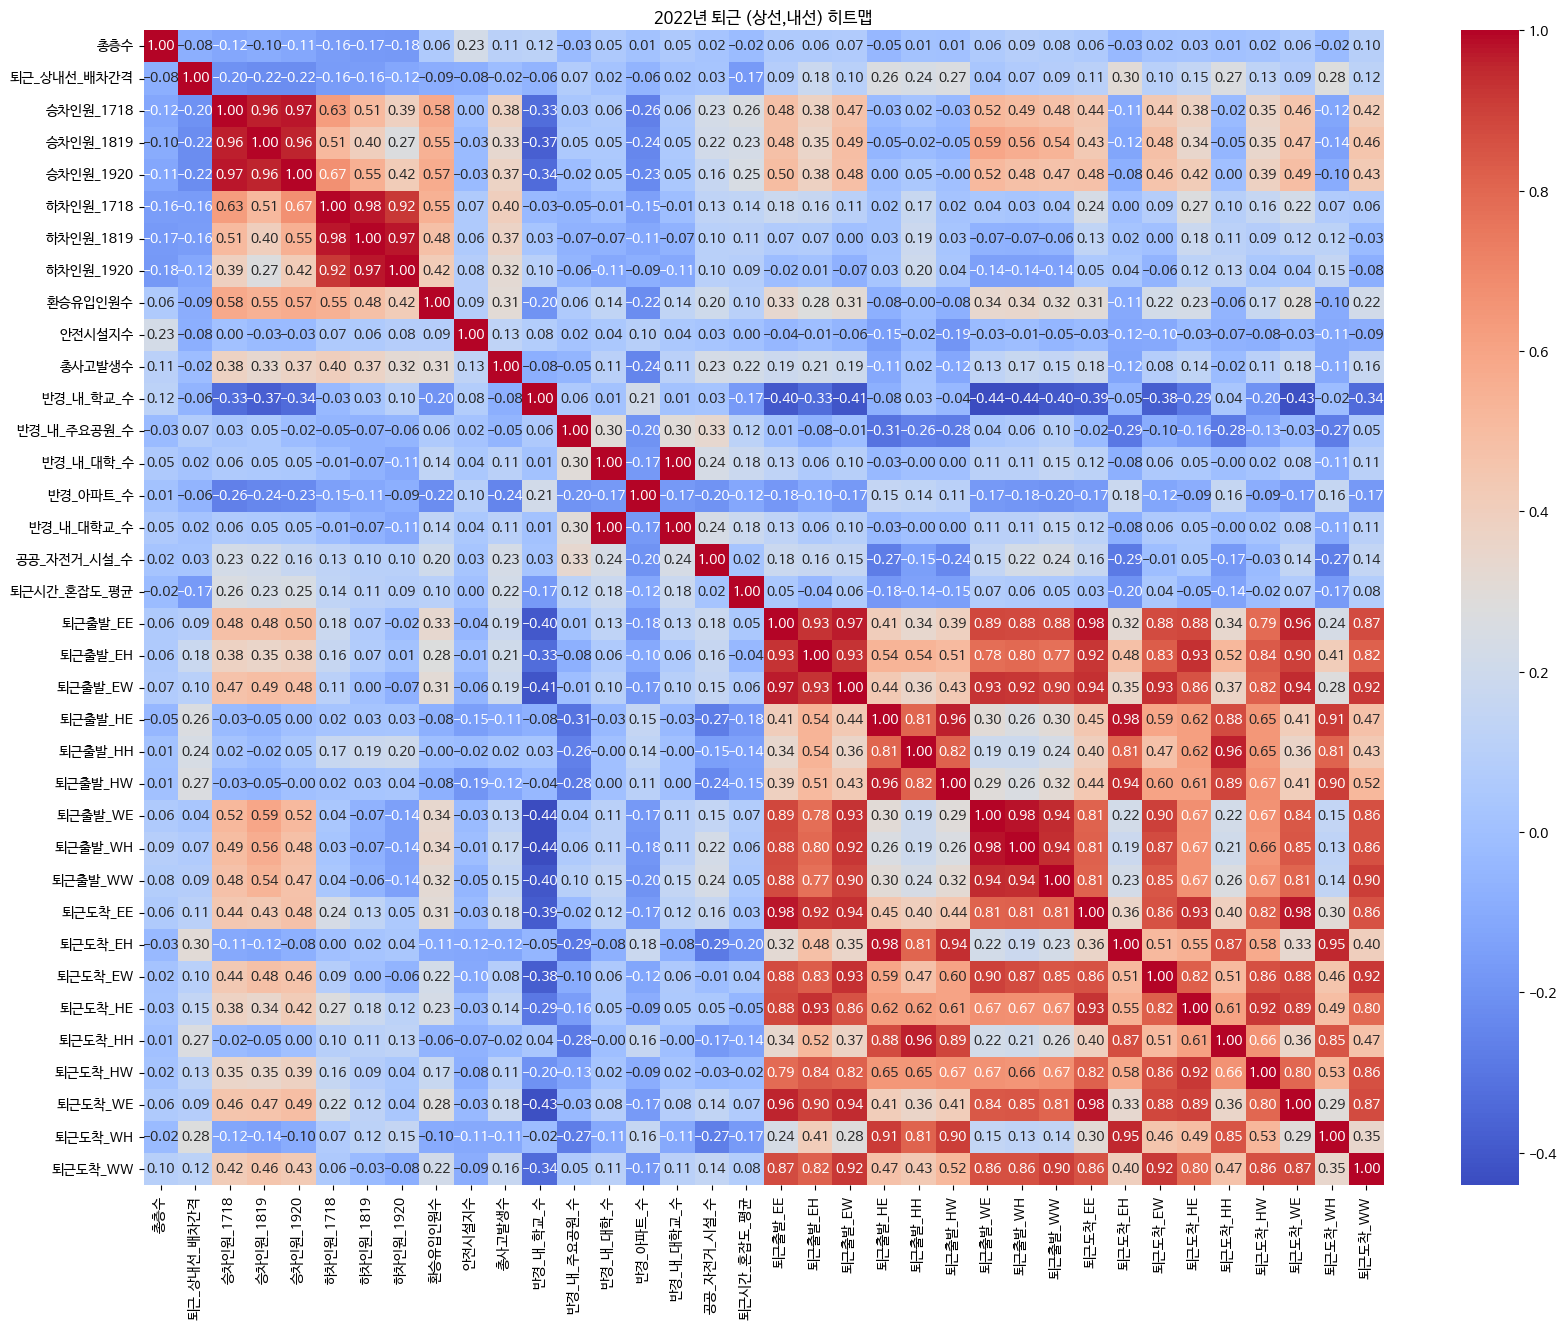

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df1.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2022년 퇴근 (상선,내선) 히트맵")
plt.show()